In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
dfFlight = pd.read_csv('FlightDelayWithWeather.csv')
dfFlight.head()

,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,Mon,Tue,Wed,Thu,Fri,Sat,AA,...,VX,Air_Temperature,Dew_Point_Temperature,Relative_Humidity,Wind_Direction,Wind_Speed,Precipitation_Per_Hour,Pressure_Altimeter,Sea_Level_Pressure,Visibility
0,0,286.0,2296,0,0,0,1,0,0,0,...,0,53.06,32.00,44.48,280.0,7.0,0.0,30.09,1018.9,10.0
1,0,217.0,1589,0,0,0,1,0,0,0,...,0,53.06,32.00,44.48,280.0,7.0,0.0,30.09,1018.9,10.0
2,0,195.0,1464,0,0,0,1,0,0,1,...,0,53.06,32.00,44.48,280.0,7.0,0.0,30.09,1018.9,10.0
3,0,218.0,1635,0,0,0,1,0,0,0,...,0,53.06,32.00,44.48,280.0,7.0,0.0,30.09,1018.9,10.0
4,1,146.0,967,0,0,0,1,0,0,0,...,0,44.96,35.96,70.52,150.0,4.0,0.0,30.08,1018.7,10.0


In [3]:
def normalizer(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(data)
    df_normalized = pd.DataFrame(np_scaled)
    return df_normalized

In [41]:
X = np.array(dfFlight.drop(['DEPARTURE_DELAY'], axis = 1).values)
Y = np.array(dfFlight['DEPARTURE_DELAY'])

X = normalizer(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.750000,0.844690,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.316456,0.250000,0.337944,0.777778,0.21875,0.0,0.506667,0.505882,1.0
1,0.537037,0.575561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316456,0.250000,0.337944,0.777778,0.21875,0.0,0.506667,0.505882,1.0
2,0.469136,0.527979,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316456,0.250000,0.337944,0.777778,0.21875,0.0,0.506667,0.505882,1.0
3,0.540123,0.593072,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.316456,0.250000,0.337944,0.777778,0.21875,0.0,0.506667,0.505882,1.0
4,0.317901,0.338789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.174051,0.340164,0.648462,0.416667,0.12500,0.0,0.493333,0.498039,1.0


# High Correlation filter

In [7]:
pd.set_option('display.max_columns', 30)
X.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,1.000000,0.996533,0.000867,-0.000944,-0.000516,0.001489,0.000895,-0.004089,0.155968,-0.130066,0.126557,0.166591,-0.016054,0.098110,-0.440621,0.317114,0.079766,0.000928,-0.017981,0.005832,0.027178,0.063904,0.035412,-0.001919,-0.053302,-0.053392,0.032169
1,0.996533,1.000000,0.000904,-0.001211,-0.000375,0.001973,0.001459,-0.005379,0.151307,-0.126140,0.132952,0.172043,-0.010668,0.086940,-0.442686,0.296978,0.085117,0.017062,-0.018492,-0.000622,0.021800,0.056900,0.036470,-0.001238,-0.042213,-0.042303,0.027306
2,0.000867,0.000904,1.000000,-0.173244,-0.177126,-0.174672,-0.178099,-0.154604,-0.001094,-0.001014,-0.000757,0.002509,-0.000289,0.000161,-0.004697,0.003839,-0.003196,-0.000659,0.012731,0.000916,-0.012332,0.052629,0.050279,0.032271,-0.041160,-0.040880,-0.029673
3,-0.000944,-0.001211,-0.173244,1.000000,-0.172400,-0.170012,-0.173347,-0.150479,0.001100,-0.001515,-0.000497,-0.003700,0.000834,0.000216,-0.004387,0.002579,-0.003638,0.000451,-0.012971,-0.020894,-0.006705,0.072594,0.069921,0.013412,0.003415,0.003630,-0.035732
4,-0.000516,-0.000375,-0.177126,-0.172400,1.000000,-0.173821,-0.177231,-0.153851,0.001208,-0.002569,-0.002596,0.001480,0.000470,-0.000828,-0.004686,0.003237,-0.005516,0.000421,-0.035429,-0.034991,-0.002089,-0.019140,-0.038407,-0.013494,0.070125,0.069430,0.058281
5,0.001489,0.001973,-0.174672,-0.170012,-0.173821,1.000000,-0.174776,-0.151719,-0.004068,-0.001708,-0.001796,0.002650,-0.001646,-0.001715,-0.004907,0.006093,0.001065,0.000700,0.016102,0.003417,-0.012072,-0.060178,-0.047109,-0.012556,0.009424,0.009365,-0.029737
6,0.000895,0.001459,-0.178099,-0.173347,-0.177231,-0.174776,1.000000,-0.154695,-0.005634,-0.000984,0.000967,0.002150,-0.000696,-0.001086,-0.007317,0.006668,-0.000176,0.002856,0.013650,0.026108,0.009388,0.003296,0.003077,-0.022043,-0.020345,-0.020522,0.009016
7,-0.004089,-0.005379,-0.154604,-0.150479,-0.153851,-0.151719,-0.154695,1.000000,0.007070,0.009063,0.002262,-0.013690,0.000985,0.003225,0.023948,-0.014986,0.010034,-0.006570,-0.014339,0.013158,0.034035,-0.033512,-0.026335,-0.010815,-0.004825,-0.004561,0.023315
8,0.155968,0.151307,-0.001094,0.001100,0.001208,-0.004068,-0.005634,0.007070,1.000000,-0.057063,-0.055853,-0.079736,-0.034446,-0.020049,-0.166761,-0.200391,-0.040252,-0.104173,-0.008887,0.001219,0.009678,0.015352,-0.000326,-0.003501,-0.012946,-0.012971,0.012280
9,-0.130066,-0.126140,-0.001014,-0.001515,-0.002569,-0.001708,-0.000984,0.009063,-0.057063,1.000000,-0.035373,-0.050498,-0.021816,-0.012698,-0.105613,-0.126912,-0.025492,-0.065975,0.029826,0.005467,-0.028988,-0.003557,0.010498,-0.000245,0.000564,0.000607,-0.002130


In [8]:
X.var()

0     0.095342
1     0.116765
2     0.128269
3     0.123472
4     0.127396
5     0.124919
6     0.128375
7     0.104374
8     0.075823
9     0.033663
10    0.032344
11    0.061568
12    0.012829
13    0.004422
14    0.180226
15    0.213247
16    0.017353
17    0.095941
18    0.017846
19    0.023734
20    0.033293
21    0.109191
22    0.033235
23    0.000589
24    0.033171
25    0.032843
26    0.012340
dtype: float64

In [42]:
X.drop([24], axis=1, inplace=True)

In [32]:
def train(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    model = RandomForestClassifier(n_jobs=-1, random_state=0) 

    predicted = cross_val_predict(model, X_train, Y_train, cv=10)
    print(metrics.accuracy_score(Y_train, predicted))
    
    model = RandomForestClassifier(n_jobs=-1, random_state=0) 
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    print(metrics.accuracy_score(Y_test, predicted))

In [43]:
train(X,Y)

0.6354688293780391
0.6423672847345695


# PCA

In [105]:
def pca_reduction(data, n):
    pca = PCA(n_components=n, svd_solver='full')
    data_pca = pca.fit_transform(data)
    df_pca = pd.DataFrame(data_pca)
    return df_pca
    
X_pca = pca_reduction(X, 19)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.087192,0.219529,-0.287689,-0.109806,0.766727,-0.055877,-0.296078,-0.344760,0.062811,0.087228,0.311702,0.501985,0.070648,0.113509,0.874376,-0.069113,-0.450140,-0.052485,0.067613
1,0.109297,0.348301,-0.291647,-0.113658,0.768028,-0.060141,-0.319986,-0.391479,0.233322,0.811468,-0.284427,0.585773,0.021017,0.060806,-0.050157,-0.050416,-0.029314,-0.103811,0.071184
2,0.120564,0.429658,-0.298326,-0.123341,0.769157,-0.051716,-0.273193,-0.416800,0.636605,-0.531058,-0.127802,0.581323,0.024313,0.048853,-0.030731,-0.047302,-0.022472,-0.101590,0.070786
3,-0.716055,-0.275283,-0.262284,-0.098363,0.750493,-0.047357,-0.295444,-0.318711,-0.082589,-0.035737,0.030451,0.551930,0.033544,0.058164,0.006742,-0.046419,-0.006478,-0.109842,0.066796
4,-0.701632,-0.301329,-0.361057,-0.098800,0.792572,-0.106707,-0.197041,0.000373,-0.027537,-0.026473,-0.003107,0.246750,0.025790,0.078041,-0.000889,-0.048736,-0.005817,-0.191242,0.011510


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2)

In [107]:
def train_pca(X,Y,n):
    X_pca = pca_reduction(X, n)
    train(X_pca, Y)

0.6300293340093435


In [137]:
model = RandomForestClassifier(n_jobs=-1, random_state=0) 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(Y_test, predicted))

0.6331570942275657


# SVD

In [17]:
from sklearn.decomposition import TruncatedSVD
def svd_reduction(data, n):
    svd = TruncatedSVD(n_components=n)
    data_svd = svd.fit_transform(data)
    df_svd = pd.DataFrame(data_svd)
    return df_svd
    
X_svd = svd_reduction(X, 15)
X_svd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.654180,-0.265819,0.462420,-0.252477,-0.124219,0.786189,-0.070146,-0.200654,-0.244820,-0.405420,-0.225389,-0.029402,0.267651,0.467187,0.043998
1,1.556819,-0.108071,0.483787,-0.241666,-0.120493,0.775770,-0.068637,-0.266448,-0.187855,-0.478641,-0.134687,0.735823,-0.383337,0.491577,-0.050494
2,1.536262,-0.063671,0.522656,-0.241161,-0.126678,0.770209,-0.058595,-0.243462,-0.169066,-0.527502,0.557117,-0.487856,-0.234080,0.487237,-0.039955
3,1.715813,-0.637322,-0.428213,-0.226665,-0.123223,0.763103,-0.054026,-0.288364,0.013835,-0.365284,-0.149401,-0.100522,-0.063938,0.476964,-0.019908
4,1.635533,-0.447385,-0.575162,-0.301205,-0.129231,0.794368,-0.102056,-0.273233,0.145239,-0.012781,0.089753,0.002822,-0.071010,0.246194,-0.063996


In [44]:
def train_svd(X,Y,n):
    X_svd = svd_reduction(X, n)
    X_train, X_test, Y_train, Y_test = train_test_split(X_svd, Y, test_size=0.2)
    model = RandomForestClassifier(n_jobs=-1, random_state=0) 

    predicted = cross_val_predict(model, X_train, Y_train, cv=10)
    print(metrics.accuracy_score(Y_train, predicted))
    
    model = RandomForestClassifier(n_jobs=-1, random_state=0) 
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    print(metrics.accuracy_score(Y_test, predicted))

In [123]:
train_svd(X, Y, 20)

0.6303190526201427
0.6319258347215181


In [124]:
train_svd(X,Y,10)

0.6301198710752182
0.6264938074889549


In [125]:
train_svd(X,Y,15)

0.6299297432368812
0.6308032157601217


In [45]:
train_svd(X,Y,19)

0.6179784454604833
0.6239341050110672


In [46]:
train_svd(X,Y,21)

0.6209993468321359
0.6221923872419174


# Feature importances

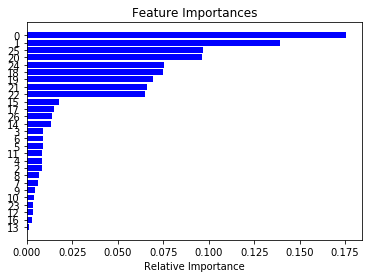

In [21]:
model = RandomForestClassifier(n_jobs=-1, random_state=0) 
model.fit(X, Y)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
X_import = X[[0,1,18,19,20,21,22,24,25]]
train(X_import,Y)

0.6192484940852021
0.6193620958670488


In [28]:
X.drop([19, 20], axis=1, inplace=True)

In [29]:
train(X,Y)

0.6328107990420204
0.6308646903008092


In [47]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree', weights='distance')

predicted = cross_val_predict(neigh, X_train, Y_train, cv=10)
print(metrics.accuracy_score(Y_train, predicted))
    

neigh.fit(X_train, Y_train)
predicted = neigh.predict(X_test)
print(metrics.accuracy_score(Y_test, predicted))

0.6314591044342841
0.6299938314162342
